# Customer Churn Prediction
In the business and companies world, it is highly prioritized to retain the company current customer before acquire new ones. As data scientist/analysit in such a company, you have to find out who is leaving and why. Normally the company has the historcal data of their customers including who has left, customer account information, services that each customer has signed up for... etc. We will work on telecommunications company dataset (the [dataset](https://www.kaggle.com/gangliu/customerchurnrate?select=ChurnData.csv) from Kaggle). Each row in the dataset represents one customer with different features as shown below.
The dataset includes information about:
*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*    Demographic info about customers – gender, age range, and if they have partners and dependents

This is classification problem and we will investage use LogisticRegression to solve it.


**Import the required libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss, confusion_matrix,classification_report, jaccard_score
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import cohen_kappa_score
import seaborn as sns

**Load the Churn dataset**

In [2]:
df = pd.read_csv('ChurnData.csv')
df.head(2)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.0,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0


In [3]:
# check if any null values in the dataset
df.isnull().values.any()
# OR
# df.isnull().sum()

False

In [4]:
# the types of the columns in the dataset
df.dtypes
# OR
# df.info()

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [5]:
# extract the input features and the target feature
y = df['churn']
x = df.drop('churn', axis=1)
# OR
# y = np.asarray(df['churn'])
# x = np.asarray(df.drop('churn', axis=1))

In [6]:
# Normalise the input features
sclar = StandardScaler()
x = sclar.fit(x).fit_transform(x)

In [7]:
# divide the dataset into 70% train and 30% test sets 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=7)

In [8]:
# check how many each class do we have from the target feature
print(y.value_counts())
print(y_test.value_counts())

0.0    142
1.0     58
Name: churn, dtype: int64
0.0    43
1.0    17
Name: churn, dtype: int64


# Quick Analyis
 Here, we extract the correlation in the dataset to see what is the reasons that make the customers leave the company.

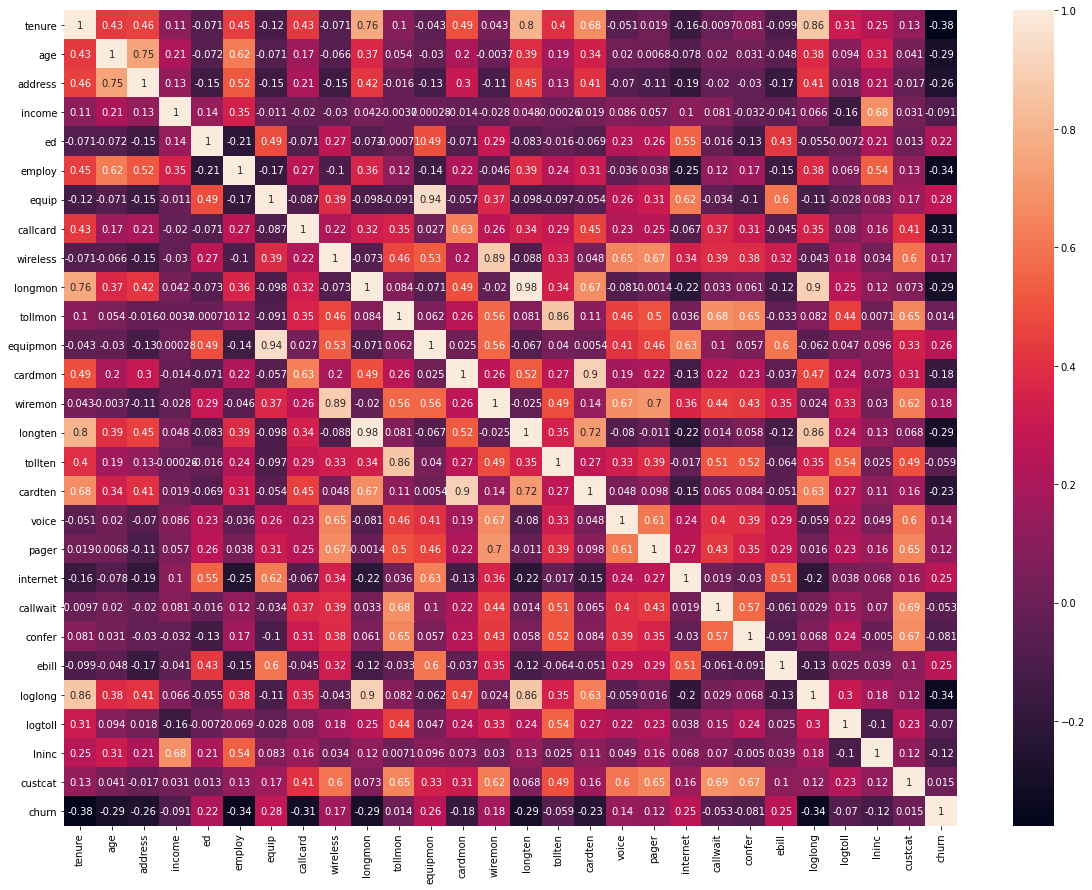

In [9]:
df_corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

In [10]:
# take the highest 10 corredlated feature with the target
sub_features = df_corr['churn'].sort_values(ascending=False).iloc[1:].head(10).index.values
sub_features = np.append(sub_features,['churn'], axis=0 )

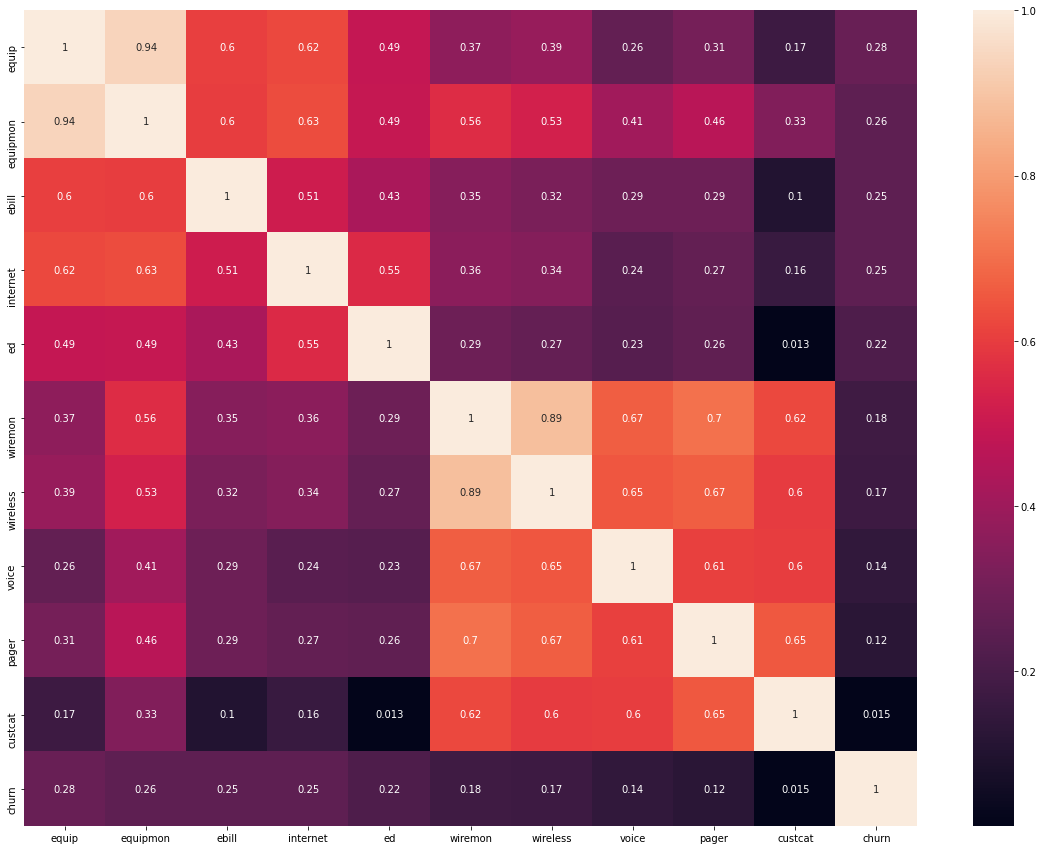

In [11]:
sub_df_corr = df[sub_features].corr()
plt.figure(figsize=(20,15))
sns.heatmap(sub_df_corr,annot=True)

It is not really obvious what are the features that are the reason of leaving a company.

#Logistic Regression

**Define the Logistic Regression Model**

In [12]:
clf = LogisticRegression(solver='sag')

In [13]:
# train the model
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

**Test the trained model**

In [14]:
y_hat = clf.predict(x_test)
y_hat

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [15]:
# predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):
y_prob = clf.predict_proba(x_test)

**Evaluation**

In [16]:
# extract the model accuracy
accuracy_score(y_test, y_hat)

0.7

**jaccard score:** we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [17]:
# extract jaccard score
jaccard_score(y_test,y_hat)

0.25

In [18]:
# extract the classification report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        43
         1.0       0.46      0.35      0.40        17

    accuracy                           0.70        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.68      0.70      0.69        60



**Logarithmic loss:**
In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [19]:
# extract the log loss metric
log_loss(y_test, y_prob)

0.7146580590568447

In [20]:
# define function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
# np.set_printoptions(precision=2)

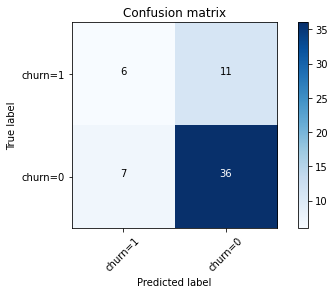

In [22]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [23]:
print('Kappa', cohen_kappa_score(y_hat,y_test),'\n')

Kappa 0.20471281296023558 



# Neural Network

In [24]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [25]:
# extract how many features do we have
x.shape

(200, 27)

In [26]:
y.shape

(200,)

In [27]:
NN = Sequential()
NN.add(tensorflow.keras.Input(shape=(x.shape[1],)))
NN.add(Dense(32, activation='relu'))
NN.add(Dense(64, activation='relu'))
NN.add(Dense(32, activation='relu'))
NN.add(Dense(1, activation='sigmoid'))

In [28]:
NN.compile(optimizer='adam', loss=tensorflow.keras.losses.binary_crossentropy,metrics=['acc'])

In [29]:
history = NN.fit(x=x_train, y=y_train, epochs=50, verbose=0)

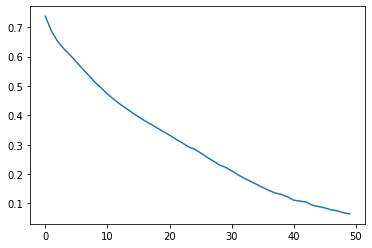

In [30]:
plt.plot(history.history['loss'])

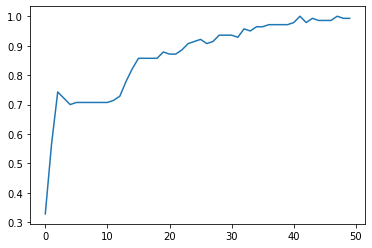

In [31]:
plt.plot(history.history['acc'])

In [32]:
y_hat = NN.predict(x_test)
y_hat = y_hat.argmax(axis=1)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

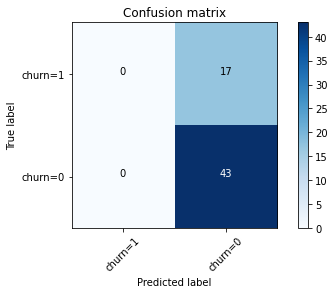

In [33]:
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [34]:
print('Kappa', cohen_kappa_score(y_hat,y_test),'\n')

Kappa 0.0 



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RF = RandomForestClassifier()

In [37]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_hat = RF.predict(x_test)

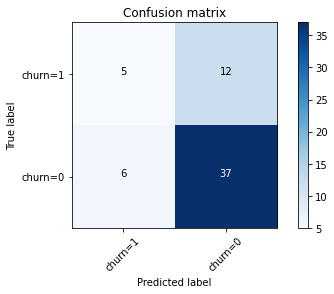

In [39]:
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print('Kappa', cohen_kappa_score(y_hat,y_test),'\n')

Kappa 0.17304747320061253 



#Results Discussion

The target feature is unblanace and thus the NN model doesnt learn effectively. We should evalute the model accuracy using Kappa insterad of the normal accuracy metric. We can use  techniques to remove the unblanace. The logistic regresion model gives better results. 